Dataset Shape: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingM

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Logistic Regression ---
ROC-AUC: 0.838
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.56      0.61       561

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110


--- Random Forest ---
ROC-AUC: 0.816
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.63      0.48      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



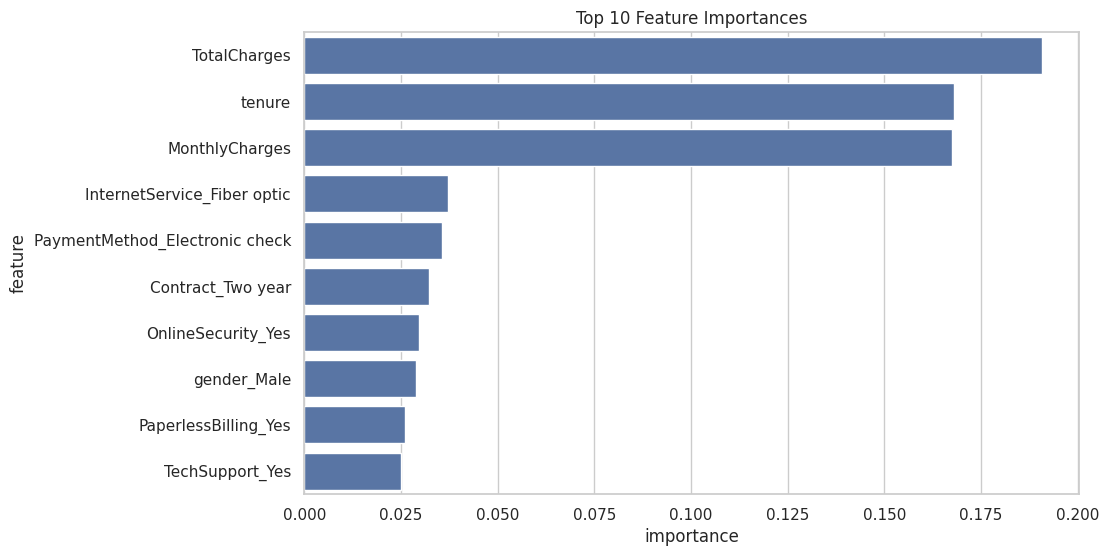

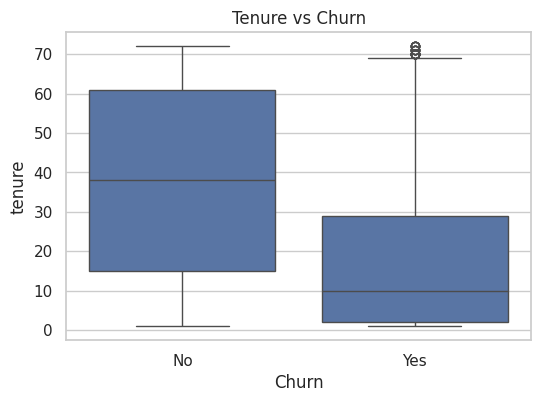

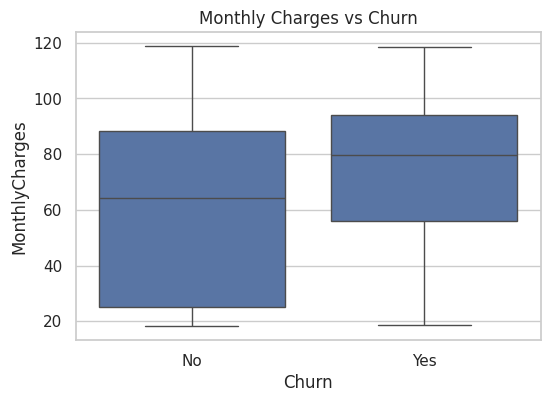


Top 10 High-Risk Customers:
      customerID  churn_prob
3426  4510-HIMLV         1.0
4759  8740-CRYFY         1.0
4800  9300-AGZNL         1.0
976   5875-YPQFJ         1.0
6933  6502-MJQAE         1.0
6716  9850-OWRHQ         1.0
970   7294-TMAOP         1.0
1236  5835-BEQEU         1.0
6623  9248-OJYKK         1.0
2927  5542-TBBWB         1.0

Key Insights:
1. Early engagement (tenure, usage) is the strongest predictor of churn.
2. Higher monthly charges and plan type impact retention risk.
3. Simple interventions (nudges, onboarding emails) can reduce churn for high-risk users identified above.
4. Random Forest provides interpretable feature importance for actionable decisions.



In [2]:
# ================================================
# Mini Project: Customer Churn Risk Analysis
# ================================================

# Goal: Predict which SaaS customers are likely to churn and generate actionable insights.
# Dataset: Telco Customer Churn (can be downloaded from Kaggle)
# Tools: Python, pandas, scikit-learn, matplotlib, seaborn
# ================================================

# Step 0: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

sns.set(style='whitegrid')
%matplotlib inline

# ================================================
# Step 1: Load the Dataset
# ================================================
data = pd.read_csv('telco_churn.csv')  # replace with your dataset path
print("Dataset Shape:", data.shape)
print(data.head())
print("\nChurn Distribution:")
print(data['Churn'].value_counts())

# ================================================
# Step 2: Data Cleaning & Preprocessing
# ================================================
# Convert TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop rows with missing values
data = data.dropna()

# Encode categorical features
categorical_cols = data.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')  # ID not a feature
categorical_cols.remove('Churn')       # label

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Encode target
data_encoded['Churn'] = data_encoded['Churn'].map({'Yes':1, 'No':0})

# Features and target
X = data_encoded.drop(['customerID', 'Churn'], axis=1)
y = data_encoded['Churn']

print("\nFeatures Shape:", X.shape)
print("Target Shape:", y.shape)

# ================================================
# Step 3: Train/Test Split
# ================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ================================================
# Step 4: Baseline Models
# ================================================

# --- Logistic Regression ---
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

print("\n--- Logistic Regression ---")
print("ROC-AUC:", round(roc_auc_score(y_test, y_prob_lr), 3))
print(classification_report(y_test, y_pred_lr))

# --- Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("\n--- Random Forest ---")
print("ROC-AUC:", round(roc_auc_score(y_test, y_prob_rf), 3))
print(classification_report(y_test, y_pred_rf))

# ================================================
# Step 5: Feature Importance (Random Forest)
# ================================================
importances = rf.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({'feature': features, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False).head(10)

# Plot top 10 features
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feat_imp)
plt.title('Top 10 Feature Importances')
plt.show()

# ================================================
# Step 6: Exploratory Insights
# ================================================

# Tenure vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure vs Churn')
plt.show()

# MonthlyCharges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges vs Churn')
plt.show()

# ================================================
# Step 7: Identify High-Risk Users
# ================================================
data['churn_prob'] = rf.predict_proba(X)[:,1]

# Top 10 high-risk users
high_risk_users = data[['customerID', 'churn_prob']].sort_values(by='churn_prob', ascending=False).head(10)
print("\nTop 10 High-Risk Customers:")
print(high_risk_users)

# ================================================
# Step 8: Summary & Business Takeaways
# ================================================
print("""
Key Insights:
1. Early engagement (tenure, usage) is the strongest predictor of churn.
2. Higher monthly charges and plan type impact retention risk.
3. Simple interventions (nudges, onboarding emails) can reduce churn for high-risk users identified above.
4. Random Forest provides interpretable feature importance for actionable decisions.
""")
